In [25]:
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
lookup = pd.read_csv("/Users/sethhowes/Desktop/FS-Tox/data/processed/assay_lookup/cancerrx_lookup.csv")

In [28]:
lookup.head()

,ccle_name,assay_size,test_train
0,22RV1_PROSTATE,540,0
1,2313287_STOMACH,613,0
2,253JBV_URINARY_TRACT,631,0
3,253J_URINARY_TRACT,607,1
4,42MGBA_CENTRAL_NERVOUS_SYSTEM,581,1


In [29]:
dataset = "cancerrx"
feature = "ecfp4_1024"
metric = "delta_auc_pr"


con = duckdb.connect()


# Create filepath pattern for each feature
score_filepaths = [f"/Users/sethhowes/Desktop/FS-Tox/data/processed/scores/*{dataset}*{feature}.parquet"]

# Convert list to string so it can be incorporated into the SQL query
score_filepaths_as_str = str(score_filepaths)

# Load scoring data from parquet files
pred_df = con.execute(
    f"""
        SELECT feature, {metric}
        FROM read_parquet({score_filepaths_as_str})
        """
).fetchdf()

In [30]:
pred_df

,feature,delta_auc_pr
0,1024,0.018259
1,1024,0.041561
2,1024,0.013655
3,1024,0.100837
4,1024,0.033802
...,...,...
477,1024,0.056957
478,1024,0.106097
479,1024,0.070106
480,1024,0.035131


In [32]:
pred_df["assay_size"] = lookup["assay_size"]

In [33]:
pred_df = pred_df.sort_values(by="assay_size")

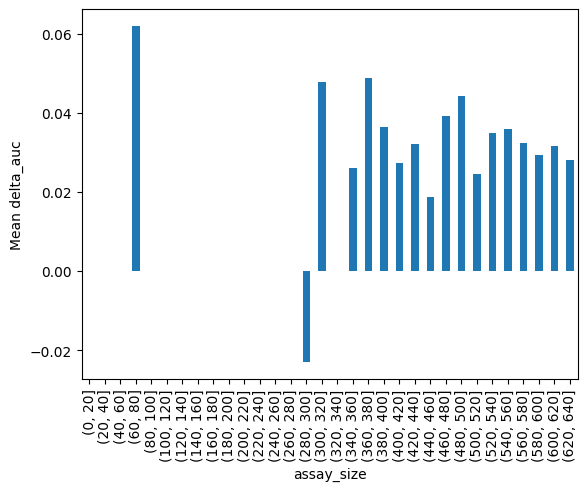

In [34]:
# Convert the assay_size into bins
bins = pd.cut(pred_df['assay_size'], bins=np.arange(0, pred_df['assay_size'].max(), 20))  # Adjust start, stop, step as per your need

# Group the data by bins and calculate the mean delta_auc for each bin
grouped = pred_df.groupby(bins)['delta_auc_pr'].mean()

# Generate a bar plot
grouped.plot(kind='bar')
plt.ylabel('Mean delta_auc')
plt.show()